In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

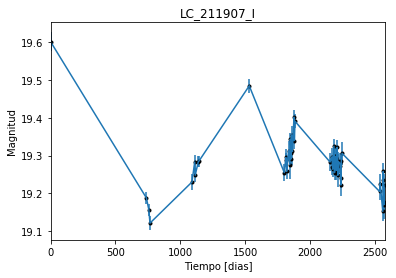

In [2]:
data = np.genfromtxt('LC_211907_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_211907_I')
plt.savefig("LC_211907_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

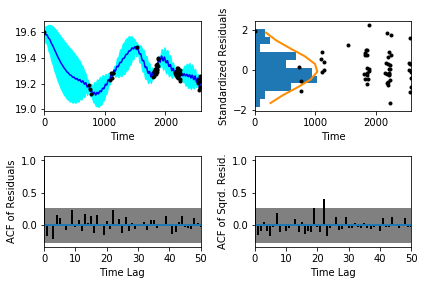

In [5]:
sample.assess_fit()

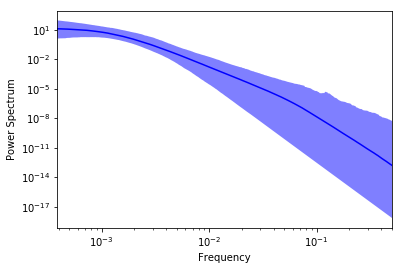

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

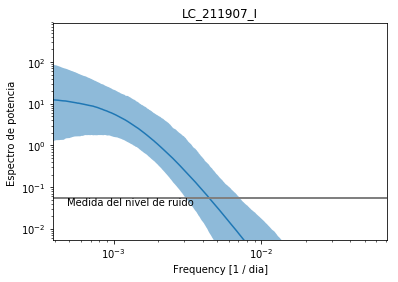

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_211907_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_211907_I')

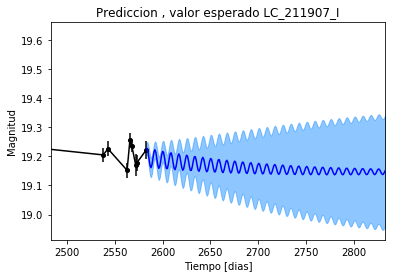

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_211907_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_211907_I')

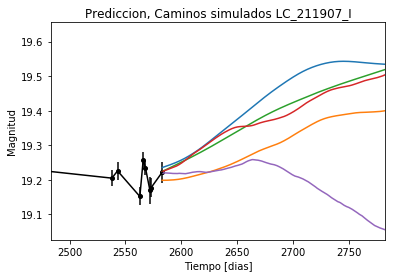

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_211907_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


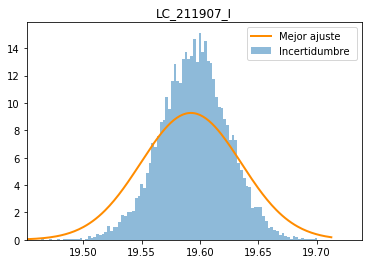

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_211907_I')
plt.savefig("Mejor_ajuste_LC_211907_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_211907_I')

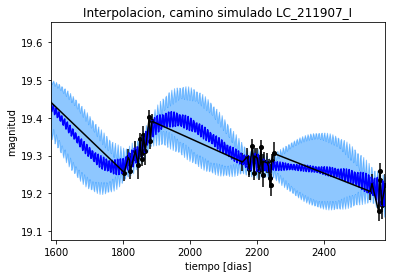

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_I')

Text(0.5,1,'Interpolacion, camino simulado LC_211907_I')

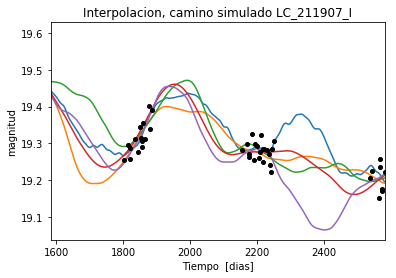

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_211907_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 937.242169255
Median: 0.00588037914745
Standard deviation: 0.160591328362
68% credibility interval: [ 0.000776    0.12716044]
95% credibility interval: [  4.24937397e-04   6.34825430e-01]
99% credibility interval: [  3.94658854e-04   8.84438844e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 665.810721151
Median: 0.001387060268
Standard deviation: 0.0819110722059
68% credibility interval: [ 0.00055913  0.01660535]
95% credibility interval: [ 0.00040656  0.24828778]
99% credibility interval: [  3.92779865e-04   6.31626858e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 378.719658538
Median: 0.00459113054805
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1135.63467758
Median: 114.448466236
Standard deviation: 1.59826552144
68% credibility interval: [ 112.62041874  115.57705831]
95% credibility interval: [ 110.21997708  116.27839049]
99% credibility interval: [ 108.25029213  116.85472643]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 581.312378185
Median: 0.351538658688
Standard deviation: 1.78589564184
68% credibility interval: [ 0.03628932  2.70512244]
95% credibility interval: [ 0.01522958  6.08207505]
99% credibility interval: [ 0.01131623  9.1477832 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 365.348052905
Median: 0.121836923783
Standard deviation: 7.45632852397
68% credibility interval: [  2.99173456e-03   4.18779099e+00]
95% credibility interval: [  3.3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2758.8248009
Median: 1.23965775558e-42
Standard deviation: 2.46248390173e+138
68% credibility interval: [  9.10641212e-80   2.48632329e-04]
95% credibility interval: [  6.08398116e-172   1.78614466e+118]
99% credibility interval: [  2.81840240e-178   9.99854014e+129]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4733.39910513
Median: 19.3387497329
Standard deviation: 0.100300384926
68% credibility interval: [ 19.26907988  19.42016649]
95% credibility interval: [ 19.14567793  19.56499832]
99% credibility interval: [ 19.026786    19.70747605]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 295.494363726
Median: 0.00178914567252
Standard deviation: 0.216841795546
68% credibility interval: [ 0.          0.24282945]
95% credibility interval: [ 0.          0.81349428]
99% credibility interval: [ 0.          0.97322088]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 295.494363726
Median: 0.00178914567252
Standard deviation: 0.216841795546
68% credibility interval: [ 0.          0.24282945]
95% credibility interval: [ 0.          0.81349428]
99% credibility interval: [ 0.          0.97322088]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1494.5641002
Median: 0.0
Standard deviation: 0.000518497917787
68% c

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1135.63467758
Median: 114.448466236
Standard deviation: 1.59826552144
68% credibility interval: [ 112.62041874  115.57705831]
95% credibility interval: [ 110.21997708  116.27839049]
99% credibility interval: [ 108.25029213  116.85472643]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1617.2498381
Median: 0.0312732778748
Standard deviation: 0.0431410959184
68% credibility interval: [ 0.01707537  0.06668227]
95% credibility interval: [ 0.01025653  0.157089  ]
99% credibility interval: [ 0.00782408  0.28008488]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2345.45800425
Median: 1.22065532472
Standard deviation: 0.191167905609
68% credibility interval: [ 1.05357019  1.43104588]
95% credibility interval: [ 0.92616672  1.67030916]
99% credibility interval: [ 0.83116126  1.84851213]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 744.245143874
Median: 2.31262828383e-05
Standard deviation: 0.0150143523268
68% credibility interval: [  1.39214388e-07   8.60639123e-04]
95% credibility interval: [  5.15069617e-124   6.21192309e-003]
99% credibility interval: [  4.09217676e-135   1.58193134e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 937.242169255
Median: (-0.0369475118599+0j)
Standard deviation: 1.69541180224
68% credibility interval: [-0.79897259-1.60374764j -0.00487576-0.0025984j ]
95% credibility interval: [ -3.98872582e+00+0.j          -2.66996041e-03-5.82067884j]
99% credibility interval: [ -5.55709315e+00-3.09075906j  -2.47971471e-03-0.00829318j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 665.810721151
Median: (-0.00871515669608+0.00350395314039j)
Standard deviation: 1.45642267568
68% credibility interval: [-0.10433449+0.22803915j -0.00351315+0.01528719j]
95% credibility interval: [-1.56003815+2.57574195j -0.00255446+0.02478486j]
99% credibility interval: [ -3.96862860e+00 +4.08210710e+00j  -2.46790868e-03 +3.17439936e-05j]
Posterior su